In [1]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pylab 
from sklearn import metrics
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA, KernelPCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, ElasticNetCV
from sklearn.linear_model import SGDRegressor, PassiveAggressiveRegressor, HuberRegressor, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
import lightgbm as lgb
from sklearn import linear_model
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.arima_model import ARIMA
from pandas import Series
from sklearn.metrics import mean_absolute_error
from pmdarima.arima import auto_arima
import requests
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller
import itertools

In [29]:
tablin = pd.read_csv(r'C:\Users\Marta\Desktop\Rotación 2 SBD\BackUp_Proyecto\Python Scripts\Modelo evolución precios\Datos - copia - Marta\tabla_linear_regression.csv',
                   sep=';', engine="python", decimal=',', encoding="latin1")

In [30]:
data= tablin.loc[:,['Predicciones','Fecha']]
data.head()

,Predicciones,Fecha
0,121574.750,01/01/2005
1,247910.250,01/01/2005
2,440613.250,01/01/2005
3,46898.500,01/01/2005
4,105511.250,01/01/2005


In [31]:
data.Fecha = pd.to_datetime(data.Fecha,  format='%d/%m/%Y')

In [32]:
data = data.set_index('Fecha')
data = data.groupby(data.index).mean()   #agrupamos por Fecha (media de precios)

In [33]:
data.Predicciones = data.Predicciones.pct_change()

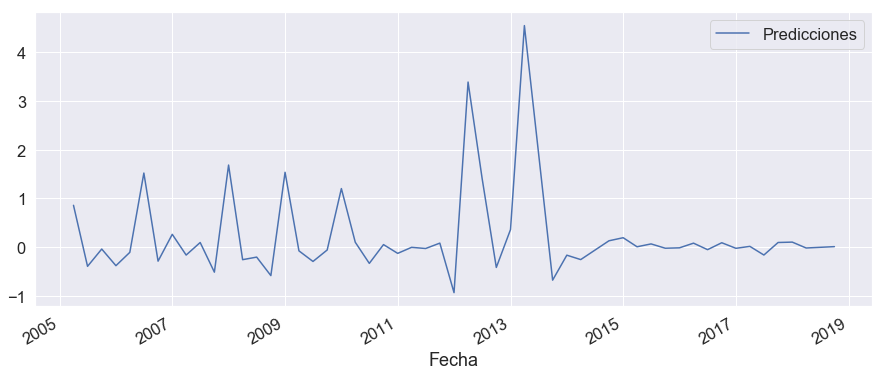

In [34]:
data.plot(figsize=(15, 6))
plt.show()

In [35]:
data= data.fillna(0)

In [36]:
#Is the data stationary? If significant, data is stationary

X = data.Predicciones
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#Data seems to be stationary (p-value= 0.03)

ADF Statistic: -3.040784
p-value: 0.031257
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602


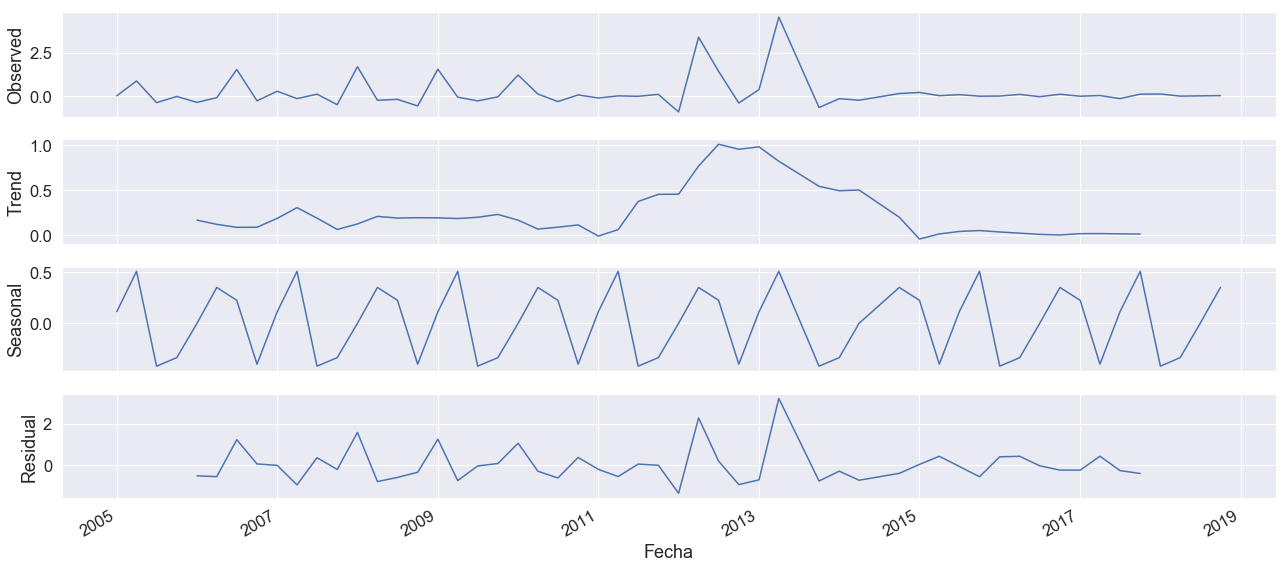

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data, model='additive', freq=8)
fig = decomposition.plot()
plt.show() 

#Obvious seasonality. Values seem slightly unstable with some extreme values from 2012 to 2014 and stability since 2014

In [38]:
train, test = train_test_split(data, test_size = 0.33, random_state = 0)

In [39]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=4,
                           start_P=0, seasonal=True,
                           d=1, D=1,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 4); AIC=154.358, BIC=163.817, Fit time=0.283 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 4); AIC=186.075, BIC=189.858, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 4); AIC=177.094, BIC=184.662, Fit time=0.033 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 4); AIC=153.526, BIC=161.094, Fit time=0.276 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 4); AIC=147.607, BIC=157.066, Fit time=0.321 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 4); AIC=155.459, BIC=163.026, Fit time=0.183 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 4); AIC=154.252, BIC=159.927, Fit time=0.150 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 4); AIC=149.103, BIC=162.346, Fit time=0.488 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 4); AIC=149.1

In [40]:
print(stepwise_model.aic())    #model with the lowest AIC

147.1408457280503


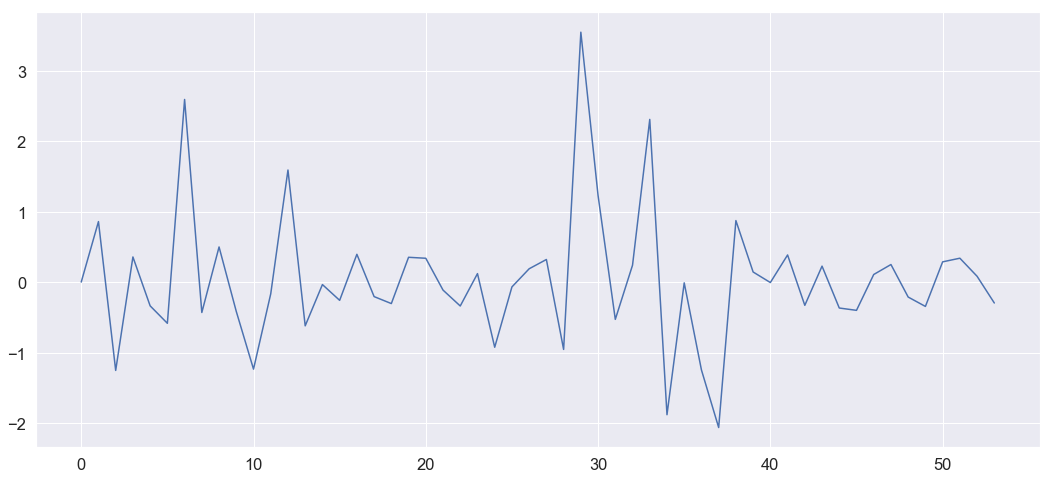

In [41]:
plt.plot(stepwise_model.resid())

In [42]:
#el modelo arima solo representa los valores que ha predicho
#si queremos representarlos para poder comparar los resultados del modelo con la realidad, calculamos lo siguiente

arima_residuals = pd.DataFrame(list(stepwise_model.resid()), index = data.index, columns=['Residuals'])
data_residuals = pd.concat([data.iloc[1:], arima_residuals.iloc[1:]], axis=1, sort=True)
data_residuals['Sum'] = data_residuals.loc[:, ['Predicciones', 'Residuals']].apply(lambda s: s[0]+s[1], axis=1)
del data_residuals['Residuals']
data_residuals

,Predicciones,Sum
Fecha,,
2005-04-01,0.859,1.723
2005-07-01,-0.393,-1.642
2005-10-01,-0.038,0.323
2006-01-01,-0.380,-0.712
2006-04-01,-0.106,-0.686
2006-07-01,1.521,4.118
2006-10-01,-0.287,-0.714
2007-01-01,0.264,0.767
2007-04-01,-0.162,-0.574


In [43]:
future_forecast = stepwise_model.predict(n_periods=8)   #predecir 8 períodos a futuro
future_forecast = pd.DataFrame(future_forecast, index = pd.to_datetime(['01/01/2019', '01/04/2019', '01/07/2019',
                                                                        '01/10/2019', '01/01/2020', '01/04/2020',
                                                                        '01/07/2020', '01/10/2020'], format='%d/%m/%Y'),
                               columns=['Predicts'])
future_forecast         #we create a dataframe with the 8 predictions, assigning their index/date

,Predicts
2019-01-01,-0.191
2019-04-01,-0.440
2019-07-01,-0.114
2019-10-01,0.107
2020-01-01,-0.479
2020-04-01,-0.752
2020-07-01,-0.333
2020-10-01,0.032


In [44]:
data_residuals = data_residuals.append(future_forecast) #now we have the previous values from linear regression and the newly predicted ones

,Predicciones,Predicts,Sum
2005-04-01,0.859,nan,1.723
2005-07-01,-0.393,nan,-1.642
2005-10-01,-0.038,nan,0.323
2006-01-01,-0.380,nan,-0.712
2006-04-01,-0.106,nan,-0.686
2006-07-01,1.521,nan,4.118
2006-10-01,-0.287,nan,-0.714
2007-01-01,0.264,nan,0.767
2007-04-01,-0.162,nan,-0.574
2007-07-01,0.096,nan,-1.134


In [45]:
a, conf_int_05 = stepwise_model.predict(n_periods=8, return_conf_int=True, alpha=0.5)
a, conf_int_95 = stepwise_model.predict(n_periods=8, return_conf_int=True, alpha=0.05)  #calculamos el intervalo de confianza del 95%

In [46]:
fechas = list(tablin.Fecha.drop_duplicates())
dictionary_dates_date_to_num = {}
dictionary_dates_num_to_date = {}
for date_iter in range(len(fechas)):
    dictionary_dates_date_to_num[fechas[date_iter]] = date_iter
    dictionary_dates_num_to_date[date_iter] = fechas[date_iter]
dictionary_dates_num_to_date[56] = '01/01/2019'
dictionary_dates_num_to_date[57] = '01/04/2019'
dictionary_dates_num_to_date[58] = '01/07/2019'
dictionary_dates_num_to_date[59] = '01/10/2019'
dictionary_dates_num_to_date[60] = '01/01/2020'
dictionary_dates_num_to_date[61] = '01/04/2020'
dictionary_dates_num_to_date[62] = '01/07/2020'
dictionary_dates_num_to_date[63] = '01/10/2020'   #info de los siguientes 8 trimestres (tenemos que asignarlo ya que el modelo no acepta fechas como índice)
list_dates = pd.to_datetime( list(dictionary_dates_num_to_date.values()), format='%d/%m/%Y')[:-1]

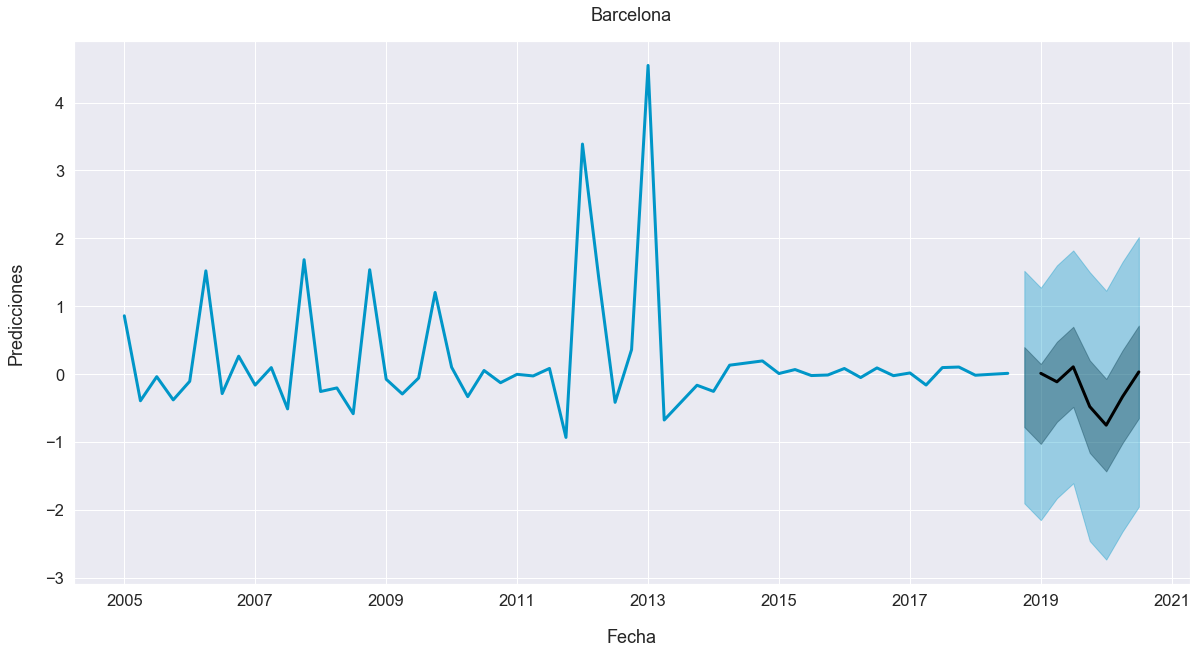

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(list_dates[54:], [data_residuals['Predicciones'][-9]]+list(data_residuals['Predicts'][55:]), alpha=1, linewidth=3.00, color='black')  # Forecasts
ax.plot(list_dates, data_residuals['Predicciones'], alpha=1, linewidth=3.00, color=(0, 150/255, 200/255))

ax.fill_between(list_dates[-len(future_forecast):],
                 conf_int_05[:, 0], conf_int_05[:, 1],
                 alpha=0.35, color='black')
ax.fill_between(list_dates[-len(future_forecast):],
                 conf_int_95[:, 0], conf_int_95[:, 1],
                 alpha=0.35, color=(0, 150/255, 200/255))  #para hacer el intervalo de confianza

plt.title("Barcelona", pad=20)
plt.xlabel("Fecha", labelpad=20)
#plt.xticks(rotation='vertical')
plt.ylabel("Predicciones", labelpad=20)

plt.show()